In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [2]:
gdp_le = pd.read_csv('../data/gdp_le.csv')
gdp_le.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575


# Problem Solving:

## 1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.

In [5]:
lr_le_yr = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

In [6]:
lr_le_yr.params

Intercept   -468.138140
Year           0.267722
dtype: float64

Substituting these estimates into the model, we get

$$Mean(Life Expectancy) = -468.138140 + 0.267722(Year)$$

### 1a. What coefficients do you get? Interpret the meaning of these coefficents.

Intercept   -468.138140 and
Year           0.267722

The intercept, -468.14, is where the Life_Expectancy variable intercepts the Y axis when the year is 0. BUT the year is never 0 in this dataset...

### 1b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [12]:
year1990_vs_le = smf.ols("Life_Expectancy ~ I(Year-1990)", data=gdp_le).fit()
year1990_vs_le.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

### 1b. cont'd - Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [14]:
lm = smf.ols('Life_Expectancy ~ Year + I(Year-1990)', data = gdp_le).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        20:51:20   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0001   6.64e-06    -15.342      0.000      -0.000   -8.89e-05
Year               0.0325      0.000    263.314      0.000       0.032       0.033
I(Year - 1990)     0.2352      0.013     17.945      0.000       0.210       0.261
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                     1.23e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

yes, based on the P values being less than 0.05 and the span of the inner quartile range being both greater than 0, I can posit that there is a non null effect. We can reject the null hypothesis and accept that the year is statistically significant as it relates to life expectancy

### 1c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?

In [17]:
lm = smf.ols('Life_Expectancy ~ Year + I(Year-1990)', data = gdp_le).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        20:51:21   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0001   6.64e-06    -15.342      0.000      -0.000   -8.89e-05
Year               0.0325      0.000    263.314      0.000       0.032       0.033
I(Year - 1990)     0.2352      0.013     17.945      0.000       0.210       0.261
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                     1.23e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### TESTED RESULTS FROM MODEL CALC TO ACTUAL DATA

In [19]:
-0.0001 + 1990 * 0.0325

64.6749

In [20]:
-0.0001	+ 1992 * 0.0325

64.7399

In [21]:
-0.0001	+ 2020 * 0.0325

65.6499

In [22]:
-0.0001	+ 2022 * 0.0325

65.7149

In [23]:
yr_mean_le = gdp_le.groupby("Year")["Life_Expectancy"].mean().reset_index()
yr_mean_le.head(3)

,Year,Life_Expectancy
0,1990,64.745253
1,1991,65.021276
2,1992,65.217845


In [24]:
yr_mean_le.tail(3)

,Year,Life_Expectancy
30,2020,72.044532
31,2021,71.520337
32,2022,72.154386


### 1d. Plot the actual values against your model's estimates for the mean life expectancy.

In [26]:
lm.params

Intercept        -0.000102
Year              0.032477
I(Year - 1990)    0.235245
dtype: float64

In [27]:
#pred_df 

In [28]:
yr_mean_le['le_mean_estimate'] = lm.predict(yr_mean_le)

yr_mean_le.head()

,Year,Life_Expectancy,le_mean_estimate
0,1990,64.745253,64.628889
1,1991,65.021276,64.896612
2,1992,65.217845,65.164334
3,1993,65.218031,65.432056
4,1994,65.339539,65.699778


In [29]:
yr_mean_le.tail()

,Year,Life_Expectancy,le_mean_estimate
28,2018,72.493003,72.125109
29,2019,72.726851,72.392831
30,2020,72.044532,72.660553
31,2021,71.520337,72.928275
32,2022,72.154386,73.195997


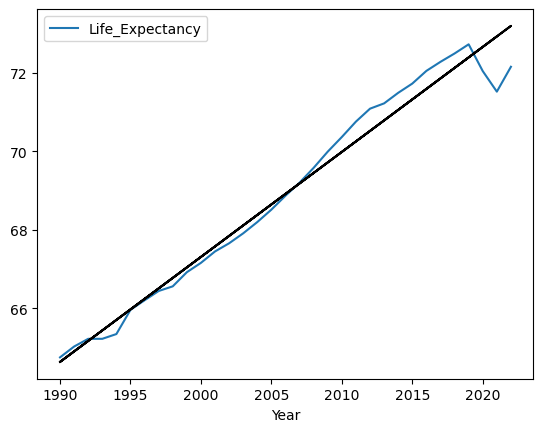

In [30]:
yr_mean_le.plot(x = 'Year', y = 'Life_Expectancy', kind = 'line')
plt.plot(gdp_le['Year'], lm.fittedvalues, color = 'black');

### 1e. Inspect the R-squared value for the model. does it make sense, given the plot?

In [32]:
lm.rsquared

0.07154748843194669

I believe so, yes. 

## 2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.

In [35]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]
gdp_le_2021.head(3)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377


In [36]:
lm = smf.ols('Life_Expectancy ~ Year + I(Year-1990)', data = gdp_le).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        20:51:21   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0001   6.64e-06    -15.342      0.000      -0.000   -8.89e-05
Year               0.0325      0.000    263.314      0.000       0.032       0.033
I(Year - 1990)     0.2352      0.013     17.945      0.000       0.210       0.261
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                     1.23e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
lm_2021 = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data = gdp_le_2021).fit()
lm_2021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        20:51:21   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         65.9499      0.549    120.225      0.000      64.867      67.033
GDP_Per_Capita     0.0003   1.76e-05     14.608      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     4.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2a. What coefficients do you get? Interpret the meaning of those coefficients.

the minimum life expectancy is 65.9499 years old - as that is the intercept on the Y axis when x is 0. Per every unit of GDP_Per_Capita, perhaps dollars?, the life expectancy increases by a factor of 0.0003 years per unit/dollar perhaps. 

### 2b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

In [41]:
lm_2021_thsnds = smf.ols('Life_Expectancy ~ Year + I(GDP_Per_Capita/1000)', data = gdp_le_2021).fit()
lm_2021_thsnds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        20:51:21   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.615e-05   1.34e-07    120.225      0.000    1.59e-05    1.64e-05
Year                         0.0326      0.000    120.225      0.000       0.032       0.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     5.26e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.56e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The intercept is close to 0 which has little to know meaning. Each year there's an increase in the life expectancy of a factor of 0.0326 which is significantly higher than the 0.0003 years from the previous model. As well, this model increases the life expectancy by a factor of 0.2569 for every $1,000 that GDP Per Capita increases.

### 2c. Are the coefficients statistically significant?


Yes - based on the P values being 0 or so close to 0. As well, the inner quartile range does not encompass 0 and therefore we can reject the null hypothesis and accept that that GDP Per Capita and and the passage of time are statistically significant as they relate to life expectancy

### 2d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is 50,000 dollars? What about one whose gdp per capita is $100,000? 

In [46]:
50 * 0.2569 + 1990*0.0326

77.719

77.719 years old --> mean years old in 1990

In [48]:
100*0.2569 + 1990*0.0326

90.564

90.564 years old --> mean years old in 1990

### 2e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?